
### Homework: Clustering Analysis on a Customers Dataset
Consider that you possess a dataset of customer information, and your task is to perform customer segmentation on this historical data. Customer segmentation involves dividing a customer base into distinct groups based on shared characteristics. This approach is crucial because it allows a business to target specific groups effectively and optimize the allocation of marketing resources. For instance, one segment might consist of high-profit, low-risk customers—those more likely to make purchases or subscribe to services, whom the business aims to retain. Another segment could be customers from non-profit organizations, among others.

In this assignment, you will perform clustering analysis on the Mall Customers Dataset. This dataset includes the `Age`, `Annual Income`, and `Spending Score` of customers. You will use K-Means and DBSCAN clustering algorithms to segment customers based on their behaviors and traits. The primary objective is to understand customer segments to tailor marketing strategies effectively.

---

#### Step 1: Data Loading and Initial Exploration

**Exercise 1:**
- Load the Mall Customers dataset from the following URL: 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv'.
- Use pandas to read the data and display the first few rows. 
- Generate basic statistics of the data using `.describe()`.


In [161]:
import pandas as pd
import io
import requests

# Load the data
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv'

s = requests.get(url).content
mall_customers = pd.read_csv(io.StringIO(s.decode('utf-8')))
# Write your code here
mall_customers.head(150)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
145,146,28,3,2,30,1.522,4.448,0.0,NBA005,19.9
146,147,37,1,18,58,2.868,3.106,NaN,NBA009,10.3
147,148,46,3,3,43,3.042,2.634,1.0,NBA013,13.2
148,149,24,2,1,42,0.838,1.556,0.0,NBA002,5.7


In [162]:
mall_customers.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [163]:
mall_customers.info() #missing some values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


#### Step 2: Data Preprocessing

**Exercise 2:**
- As observed, the "Address" field in this dataset is a categorical variable. The k-means algorithm, which relies on Euclidean distance, isn't suitable for categorical data because this type of distance measure doesn't make sense for discrete variables. Therefore, exclude this feature and proceed with the clustering analysis.
- Now  normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.





In [164]:
from sklearn.preprocessing import StandardScaler

# Write your code here
# drop columns Customeer Id, Defaulted, address.
columns_dropped = ['Customer Id', 'Defaulted', 'Address']
mall_customers_dropped = mall_customers.drop(columns=columns_dropped)
scaler = StandardScaler()   # create new scaler object. 
mall_customers_normalized = pd.DataFrame(scaler.fit_transform(mall_customers_dropped), columns=mall_customers_dropped.columns)
print(mall_customers_normalized.head())

        Age       Edu  Years Employed    Income  Card Debt  Other Debt  \
0  0.742915  0.312122       -0.378790 -0.718459  -0.683811   -0.590489   
1  1.489490 -0.766349        2.573721  1.384325   1.414474    1.512962   
2 -0.252518  0.312122        0.211712  0.268032   2.134141    0.801704   
3 -0.750235  0.312122       -0.674041 -0.718459  -0.421643   -0.754467   
4  1.489490 -0.766349        3.311849  5.356249   3.638900    1.716094   

   DebtIncomeRatio  
0        -0.576525  
1         0.391387  
2         1.597554  
3        -0.576525  
4        -0.442507  


#### Step 3: Applying K-Means Clustering

**Exercise 3:**
- Apply K-Means clustering on the processed data. Choose a suitable number of clusters (start with `k=3`).
- Fit the model and then predict the cluster labels.
- Add these labels as a new column in the DataFrame and create a new DataFrame.
- Calculate the centroid value of each class.



In [165]:
from sklearn.cluster import KMeans

# Write your code here
kmeans = KMeans(n_clusters=3)  # create kmeans object with 3 as inputs. 
labels = kmeans.fit_predict(mall_customers_normalized)
mall_customers_labels = mall_customers.copy()
mall_customers_labels['cluster'] = labels
print(mall_customers_labels.head())




   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  cluster  
0        0.0  NBA001              6.3        0  
1        0.0  NBA021             12.8        1  
2        1.0  NBA013             20.9        2  
3        0.0  NBA009              6.3        0  
4        0.0  NBA008              7.2        1  


**Exercise 4:**
- Plot the results using a scatter plot. Use `Age` as the x-axis and `Income` as the y-axis. Color the points based on the cluster labels.
- Interpret the plot. What does each cluster seem to represent in terms of customer behavior?


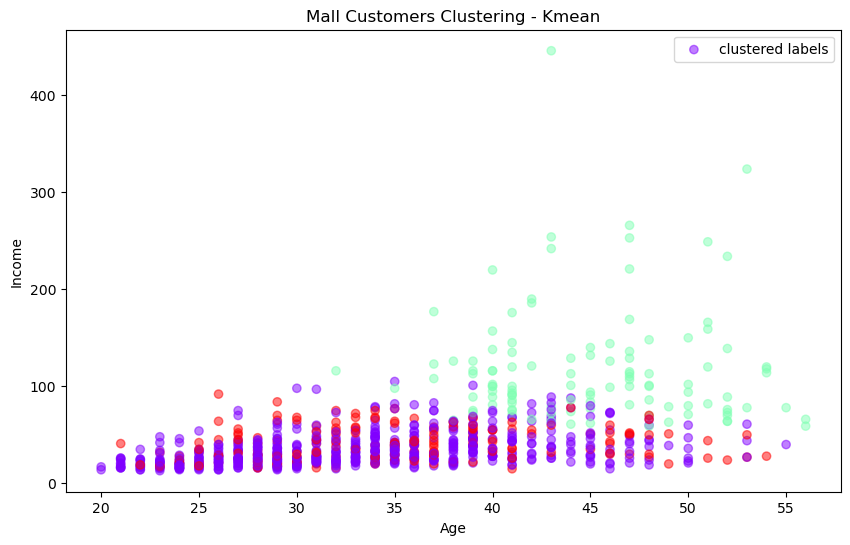

In [166]:
import matplotlib.pyplot as plt

# Write your code here 
# Creating a plot for kmean values.  
plt.figure(figsize=(10,6))
plt.scatter(mall_customers_labels['Age'], mall_customers_labels['Income'], c = mall_customers_labels['cluster'], cmap = 'rainbow', alpha = 0.5, label = 'clustered labels')
plt.title('Mall Customers Clustering - Kmean')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()


### Descreption K-mean ###
- According to the figure, I identified three clusters:
- The middle-income group is around 100, and there is a clear separation above 100, representing the high-income group. Older individuals tend to fall into other clusters.
- Low income is associated with younger to middle-aged individuals.
- However, the plot shows no clear separation between the low- and middle-income clusters. 



#### Step 4: Applying DBSCAN Clustering

**Exercise 5:**
- Apply DBSCAN to the same dataset. Start with `eps=0.5` and `min_samples=5`.
- Fit the model and then predict the cluster labels.
- Determine the count of predicted classes. Adjust 'eps' and 'min_samples' to attain a total of three classes.
- Add these labels as a new column in your DataFrame and create a new DataFrame.

In [167]:
import numpy as np
from sklearn.cluster import DBSCAN

# Write your code here
# to create DBSCAN plot.
dbscan = DBSCAN(eps=1.39, min_samples=3) #after few itterations found eps=1.39, min_samples=3 are the optimal values.
dbscan.fit(mall_customers_normalized)
db_labels = dbscan.labels_
mall_customers_db = mall_customers.copy()
mall_customers_db['cluster'] = db_labels
mall_customers_db.head()
dbunique_labels, count = np.unique(db_labels, return_counts=True)

print('Labels: %s' % str(dbunique_labels))
print('Cluster size: %s' % str(count))


Labels: [-1  0  1  2]
Cluster size: [ 55 788   3   4]


**Exercise 6:**
- Plot the results using the same scatter plot setup as in Exercise 4.
- Compare the results with K-Means. How does DBSCAN differ in terms of cluster formation?

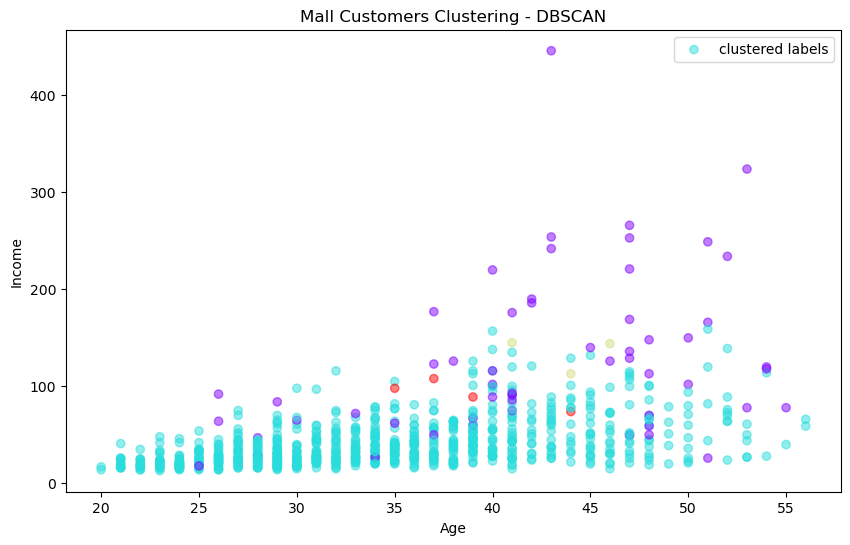

In [168]:
# Write your code here
plt.figure(figsize=(10,6))
plt.scatter(mall_customers_db['Age'], mall_customers_db['Income'], c = mall_customers_db['cluster'], cmap = 'rainbow', alpha = 0.5, label = 'clustered labels')
plt.title('Mall Customers Clustering - DBSCAN')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

### comprison between DBSCAN & Kmean ###
- Both DBSCAN and K-means do not clearly show good clusters.
- In K-means, there are two clusters below the 100 income level, but DBSCAN combines them into one cluster.
- DBSCAN shows high-income people above 150 income, while in K-means, high-income starts above 100 income.
- DBSCAN shows middle-income people around 75 income, including both young and middle-aged people.
- Low-income is around 20-25 income for both young and middle-aged people.

#### Step 5: Evaluation and Interpretation

**Exercise 7:**
- Calculate and compare the silhouette scores for both K-Means and DBSCAN.
- Discuss the strengths and weaknesses of each clustering method based on the dataset and the results obtained.

In [169]:
from sklearn.metrics import silhouette_score

# Write your code here

# caluculation silhouette. 
kmean_sil = silhouette_score(mall_customers_normalized,labels)
db_sil = silhouette_score(mall_customers_normalized, db_labels)
print(f"K-Means Silhouette Score: {kmean_sil}")
print(f"DBSCAN Silhouette Score: {db_sil}")


K-Means Silhouette Score: 0.2581890563268373
DBSCAN Silhouette Score: 0.16382372408332047


### Discussion ###

- From the output results we can see K-Mean is giving us good results compare to DBSCAN in that case.
- DBSCAN is giving us one large cluster & few small clusters. 
- K-mean is more efficient & easy to implement compare to DBSCAN.
- K-mean is more robust to noise compare to DBSCAN.
- DBSCAN is more robust to outliers compare to K-mean. 
- In DBSCAN you needs to find good fitting values to get good results.  




#### Submission Instructions
Please submit your finished Jupyter Notebook with all exercises fully completed. Make sure to include comments in your code cells to clarify your thought process and results. Below each corresponding exercise, add your discussions in a "Markdown" section within this file.
